In [15]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [17]:
with MPRester("eydjkyvaohvx0D8I") as m:
    structure = m.get_bandstructure_by_material_id("mp-30460")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

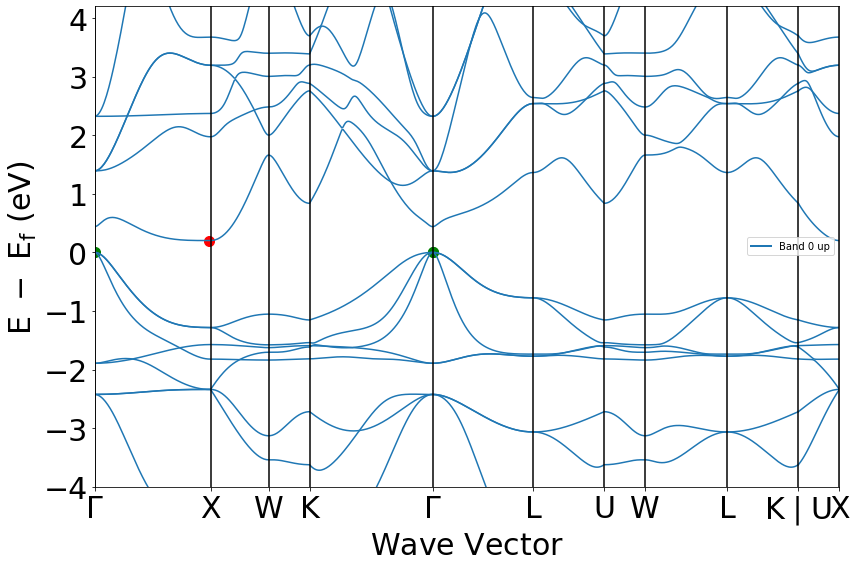

In [32]:
plot = BSPlotter(structure)
plot.get_plot(vbm_cbm_marker=True)

In [19]:
gap = structure.get_band_gap()
e_band = gap.get('energy')
print('Energie de la bande :', e_band, 'eV.')
if gap.get('direct') == False:
    print('La bande interdite est indirecte.')
else:
    print('La bande interdite est directe.')

print('La bande interdite se situe entre 0 eV et {} eV.'.format(e_band))
print("Vecteur de transition :", gap['transition'])

Energie de la bande : 0.2016 eV.
La bande interdite est indirecte.
La bande interdite se situe entre 0 eV et 0.2016 eV.
Vecteur de transition : \Gamma-(0.495,0.000,0.495)


# Analyse des résultats

Le gap ayant une valeur de l'ordre de 0.2016eV, nous pouvons affirmer que le matériau est conducteur étant donné que cette valeur est inférieure à 1eV. De plus cette valeur est confirmée par Material Project.

# Dispersion

In [27]:
data = plotter.BSPlotter(structure).bs_plot_data()
E_0 = data.get('zero_energy')

In [28]:
vbm = structure.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = ',E_vbm,'eV')
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =', kpoint_vbm)
print(vbm.get('band_index'))

Energie du maximum de la bande de valence =  5.9717 eV
sur le graphe : E-Ef =  0.0
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})


In [26]:
cbm = structure.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))

Energie du minimum de la bande de conduction =  6.1733 eV
sur le graphe : E-Ef =  0.2016
Vecteur k (coordonnées cartésiennes) = [0.         0.95704128 0.        ]
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


In [33]:
x = data.get('ticks').get('distance')
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[15], x[17], x[18]])
y = data.get('energy')

In [37]:
dx = np.zeros(10)
dyc = np.zeros(10)
dyv = np.zeros(10)
mc = np.zeros(10)
mv = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dyv[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
    dyc[i] =y.get('1')[i][16][-1] - y.get('1')[i][16][0]
    
for i in range (10):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 
    

print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.3270797439751012
Plus grande dispersion pour la bande de conduction:  3.0187884271893646
Plus faible dispersion pour la bande de valence:  0.29044444059444124
Plus faible dispersion pour la bande de conduction:  0.24539548293095284


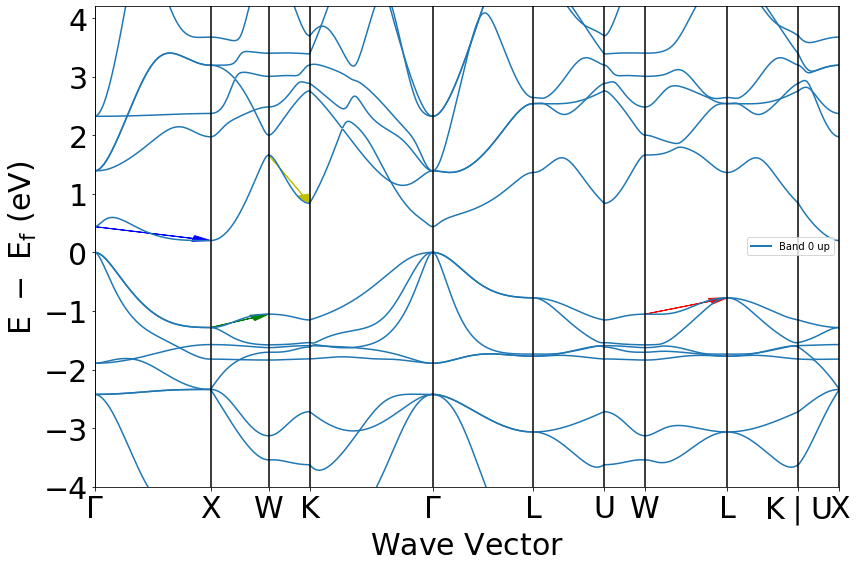

Plus grande dispersion pour la bande de valence en vert
Plus grande dispersion pour la bande de conduction en jaune
Plus petite dispersion pour la bande de valence en rouge
Plus petite dispersion pour la bande de conduction en bleu


In [39]:
BSPlotter(structure).get_plot()
plt.arrow(x[7], (y.get('1')[7][15])[0], dx[7], dyv[7], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[1], (y.get('1')[1][15])[0], dx[1], dyv[1], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][16])[0], dx[0], dyc[0], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[2], (y.get('1')[2][16])[0], dx[2], dyc[2], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

print("Plus grande dispersion pour la bande de valence en vert")
print("Plus grande dispersion pour la bande de conduction en jaune")
print("Plus petite dispersion pour la bande de valence en rouge")
print("Plus petite dispersion pour la bande de conduction en bleu")

# Masse

In [40]:
kpoint_val = structure.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))

kpoint_con = structure.get_cbm().get('kpoint').frac_coords
norm_k_con = np.linalg.norm(kpoint_con)

print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_con))

Pour la bande de valence, la valeur de la norme est 0.0
Pour la bande de conduction, la valeur de la norme est 0.6998170193893967


In [41]:
h_bar = 6.5821e-16
m_electron = 9.11e-31

## Dernière bande de valence

In [42]:
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
print('La masse effective au sommet de la dernière bande de valence = {} kg.'.format(m_vbm))

La masse effective au sommet de la dernière bande de valence = 0.0 kg.


La formule ne fonctionne pas ici étant donné que la norme du vecteur est de 0.0

## Première bande de conduction

In [43]:
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective à la base de la première bande de conduction = {} kg.'.format(m_cbm))

La masse effective à la base de la première bande de conduction = 3.2139781354339284e-32 kg.
